In [13]:
import pandas
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

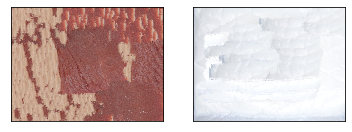

In [5]:
carne = cv2.imread('carne.jpeg')
fondo = cv2.imread('fondo.jpeg')

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(carne, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(fondo, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [8]:
nrows,ncols,_= carne.shape
Xcarne = np.reshape(carne,(nrows*ncols,3))
nrows,ncols,_= fondo.shape
Xfondo = np.reshape(fondo,(nrows*ncols,3))

idx = np.random.permutation(nrows*ncols)[:5000]
Xfondo = Xfondo[idx,:]
Xcarne = Xcarne[idx,:]

print('Xcarne',Xcarne.shape)
print('Xfondo',Xfondo.shape)

Xcarne (5000, 3)
Xfondo (5000, 3)


In [11]:
X = np.concatenate((Xcarne,Xfondo),axis=0)
y = np.zeros(10000)
y[:5000] = 1
print('X',X.shape)
print('Y',len(y),y)

X (10000, 3)
Y 10000 [1. 1. 1. ... 0. 0. 0.]


In [14]:
model = SVC()
model.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
def analizar_imagen(filename,model):
    img = cv2.imread(filename)
    
    nrows,ncols,_=img.shape
    Ximg = np.reshape(img,(nrows*ncols,3))
    
    y = model.predict(Ximg)
    yimg = np.reshape(y,(nrows,ncols))
    
    imgcarne = img.copy()
    imgcarne[yimg==0,:] = 0
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,3,2)
    plt.imshow(yimg,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1,3,3)
    plt.imshow(cv2.cvtColor(imgcarne, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()

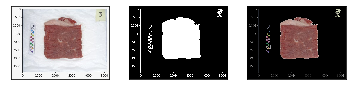

In [29]:
analizar_imagen('prueba1.jpeg',model)

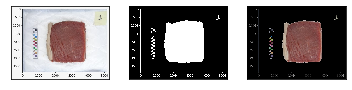

In [30]:
analizar_imagen('prueba2.jpeg',model)

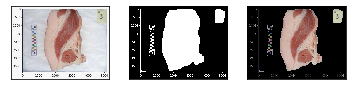

In [31]:
analizar_imagen('prueba3.jpeg',model)